<a href="https://colab.research.google.com/github/CristianMts/Escola-DNC/blob/main/Desafio06_CristianDosReisMartins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [291]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import google.colab.files as files
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, roc_curve, classification_report, accuracy_score,
                             balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

## 1. ETAPA 1 | Análise exploratória dos dados (Data Understanding)

In [292]:
dataset = files.upload()

Saving streaming_data.csv to streaming_data (3).csv


In [293]:
streaming = pd.read_csv('streaming_data.csv')

In [294]:
display(streaming.head())

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [295]:
print('Describe\n')
display(streaming.describe().T)
print('Dtypes\n')
display(streaming.dtypes)
print('IsNA\n')
display(streaming.isna().sum())

Describe



,count,mean,std,min,25%,50%,75%,max
Age,66607.0,43.511072,15.043158,18.0,30.00,43.00,57.0,69.0
Time_on_platform,56464.0,4385.848505,2526.580859,0.0,2196.00,4384.00,6573.0,8759.0
Devices_connected,52696.0,2.995370,1.414072,1.0,2.00,3.00,4.0,5.0
Num_streaming_services,9572.0,2.496239,1.120700,1.0,1.00,2.00,4.0,4.0
Num_active_profiles,77884.0,3.002273,1.413235,1.0,2.00,3.00,4.0,5.0
Avg_rating,60614.0,3.002252,1.154963,1.0,1.99,3.01,4.0,5.0
Churned,61148.0,0.243066,0.428938,0.0,0.00,0.00,0.0,1.0


Dtypes



,0
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


IsNA



,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


Text(0.5, 1.0, 'Quantidade de dados faltantes')

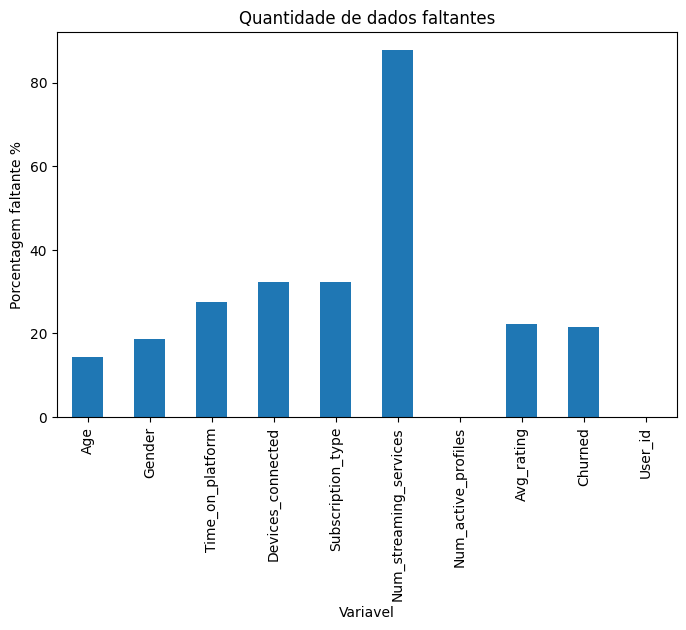

In [296]:
(streaming.isnull().mean()*100).plot.bar(figsize=(8,5))
plt.ylabel('Porcentagem faltante %')
plt.xlabel('Variavel')
plt.title('Quantidade de dados faltantes')

## 2. ETAPA 2 | Tratamento dos Dados (Data Preparation)

In [297]:
#Substituir valores “NaN” por 0 Colunas → Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected
streaming['Time_on_platform'].fillna(0, inplace=True)
streaming['Num_streaming_services'].fillna(0, inplace=True)
streaming['Churned'].fillna(0, inplace=True)
streaming['Avg_rating'].fillna(0, inplace=True)
streaming['Devices_connected'].fillna(0, inplace=True)

<ipython-input-297-48883c1a2e25>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  streaming['Time_on_platform'].fillna(0, inplace=True)
<ipython-input-297-48883c1a2e25>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [298]:
#Dropar linhas nulas nas colunas Gender, Subscription_type e Age
streaming.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

In [299]:
display(streaming.isnull().mean()*100)

,0
Age,0.0
Gender,0.0
Time_on_platform,0.0
Devices_connected,0.0
Subscription_type,0.0
Num_streaming_services,0.0
Num_active_profiles,0.0
Avg_rating,0.0
Churned,0.0
User_id,0.0


In [300]:
#Transformando valores churned 0 e 1 por No e Yes
streaming['Churned'].replace({0: 'No', 1: 'Yes'}, inplace=True)
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 3.1+ MB


<ipython-input-300-7709916d2e94>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  streaming['Churned'].replace({0: 'No', 1: 'Yes'}, inplace=True)


In [301]:
#Transformando valores floats em valores inteiros
streaming['Time_on_platform'] = streaming['Time_on_platform'].astype(int)
streaming['Age'] = streaming['Age'].astype(int)
streaming['Num_streaming_services'] = streaming['Num_streaming_services'].astype(int)
streaming['Avg_rating'] = streaming['Avg_rating'].astype(int)
streaming['Devices_connected'] = streaming['Devices_connected'].astype(int)
streaming.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


## 3. ETAPA 3 | Modelagem dos Dados - Regressão Logística

In [302]:
#Definir variáveis X e y para o modelo
X = streaming.drop(['User_id', 'Churned'], axis=1)
y = streaming['Churned']

In [303]:
le = LabelEncoder()
y = le.fit_transform(y)
streaming['Gender'] = le.fit_transform(streaming['Gender'])
streaming['Subscription_type'] = le.fit_transform(streaming['Subscription_type'])
X = pd.get_dummies(X)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [304]:
#Separando dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [305]:
#Treinando
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [306]:
y_pred = model.predict(X_test)

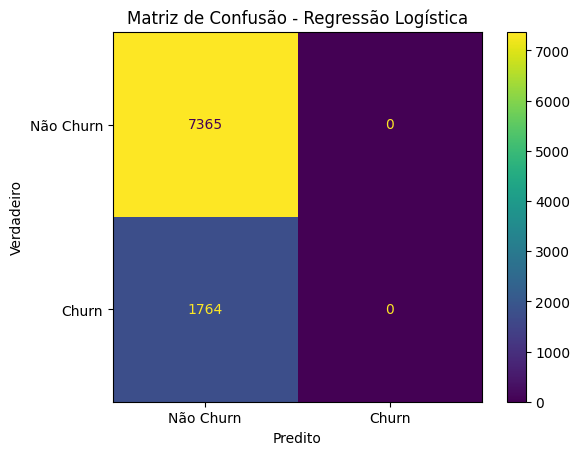

In [307]:
#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

In [308]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

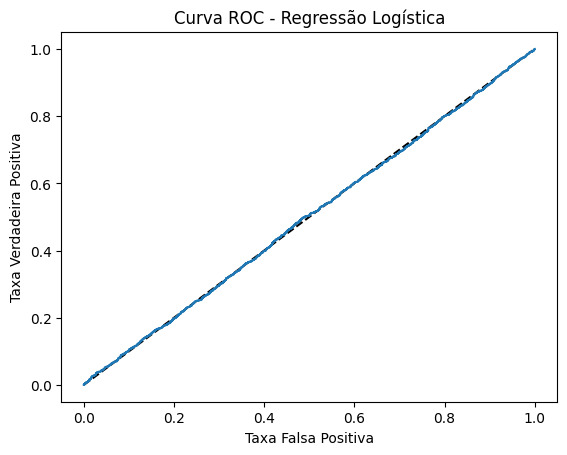

In [309]:
#Plotando ROC
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa Falsa Positiva')
plt.ylabel('Taxa Verdadeira Positiva')
plt.title('Curva ROC - Regressão Logística')
plt.show()

In [310]:
#Métricas
print('\nMétricas - Regressão Logística')
print(f'Acurácia (Treino): {accuracy_score(y_train, model.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, y_pred)}')
print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, model.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, y_pred)}')
print(f'Precision (Teste): {precision_score(y_test, y_pred, pos_label=1)}')
print(f'Recall (Teste): {recall_score(y_test, y_pred, pos_label=1)}')
print(f'F1-Score (Teste): {f1_score(y_test, y_pred, pos_label=1)}')
print(f'ROC AUC (Treino): {roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])}')
print(f'ROC AUC (Teste): {roc_auc_score(y_test, y_pred_prob)}')


Métricas - Regressão Logística
Acurácia (Treino): 0.8067625794201416
Acurácia (Teste): 0.8067696352283931
Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5
Precision (Teste): 0.0
Recall (Teste): 0.0
F1-Score (Teste): 0.0
ROC AUC (Treino): 0.5134066420388499
ROC AUC (Teste): 0.49919996059070837


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 4. ETAPA 4 |  Modelagem dos Dados - Tunning

In [311]:
X = streaming.drop(['User_id', 'Churned'], axis=1)
y = streaming['Churned']

In [312]:
le = LabelEncoder()
y = le.fit_transform(y)
streaming['Gender'] = le.fit_transform(streaming['Gender'])
streaming['Subscription_type'] = le.fit_transform(streaming['Subscription_type'])
X = pd.get_dummies(X)
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [313]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [314]:
#Hiperparâmetros
parameters = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [100, 300, 500]
}

In [315]:
#Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [316]:
dbest_params = grid_search.best_params_
print(f"Melhores parâmetros: {dbest_params}")

Melhores parâmetros: {'max_depth': 1, 'n_estimators': 100}


In [317]:
rf_tunned = RandomForestClassifier(**dbest_params)
rf_tunned.fit(X_train, y_train)

RandomForestClassifier(max_depth=1)

In [318]:
y_pred_train = rf_tunned.predict(X_train)
y_pred_test = rf_tunned.predict(X_test)

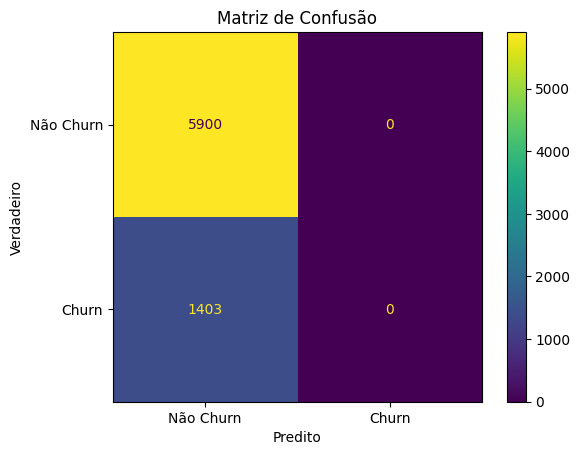

In [319]:
#Matriz de Confusão Ajustado
cm = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Matriz de Confusão')
plt.show()

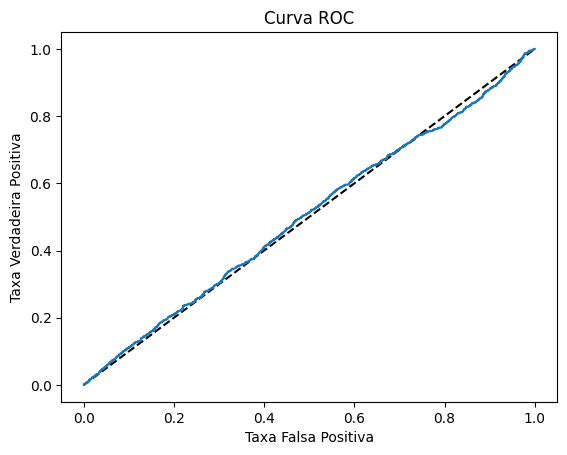

In [320]:
#ROC Ajustado
y_pred_prob = rf_tunned.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa Falsa Positiva')
plt.ylabel('Taxa Verdadeira Positiva')
plt.title('Curva ROC')
plt.show()

In [321]:
#Métricas Ajustado
print(f'Acurácia (Treino): {accuracy_score(y_train, y_pred_train)}')
print(f'Acurácia (Teste): {accuracy_score(y_test, y_pred_test)}\n')

print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, y_pred_train)}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, y_pred_test)}\n')

print(f'Precision (Treino): {precision_score(y_train, y_pred_train, zero_division=1)}')
print(f'Precision (Teste): {precision_score(y_test, y_pred_test, zero_division=1)}\n')

print(f'Recall (Treino): {recall_score(y_train, y_pred_train, zero_division=1)}')
print(f'Recall (Teste): {recall_score(y_test, y_pred_test, zero_division=1)}\n')

print(f'F1-Score (Treino): {f1_score(y_train, y_pred_train, zero_division=1)}')
print(f'F1-Score (Teste): {f1_score(y_test, y_pred_test, zero_division=1)}\n')

print(f'ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:, 1])}')
print(f'ROCAUC (Teste): {roc_auc_score(y_test, y_pred_prob)}')

Acurácia (Treino): 0.8064836368615638
Acurácia (Teste): 0.8078871696563056

Acurácia Balanceada (Treino): 0.5
Acurácia Balanceada (Teste): 0.5

Precision (Treino): 1.0
Precision (Teste): 1.0

Recall (Treino): 0.0
Recall (Teste): 0.0

F1-Score (Treino): 0.0
F1-Score (Teste): 0.0

ROCAUC (Treino): 0.5213912735674213
ROCAUC (Teste): 0.5028774901240682


## 5. ETAPA 5 | Modelagem dos Dados - Random Forest

In [322]:
rf =  RandomForestClassifier()

In [323]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [324]:
rf.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [325]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,churn,label
11843,0.490196,1.0,0.706131,0.6,0.0,0.0,0.75,0.0,0,0
12678,0.980392,0.0,0.492636,0.6,1.0,0.0,0.75,0.8,0,0
35053,0.274510,0.0,0.097500,0.0,0.0,0.0,0.00,0.0,1,1
36421,0.411765,0.0,0.812992,0.0,1.0,0.0,0.25,0.0,1,1
19202,0.235294,0.0,0.303573,0.8,0.0,0.0,0.75,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...
19452,0.176471,1.0,0.000000,0.8,0.5,0.0,1.00,0.4,0,0
29606,0.470588,0.0,0.000000,0.0,0.0,0.0,0.50,0.2,0,0
35400,0.313725,0.0,0.715493,0.6,1.0,0.0,1.00,0.6,0,0
7825,0.941176,1.0,0.000000,0.2,0.0,0.0,0.50,0.4,0,0


Text(0.5, 1.0, 'Projetado')

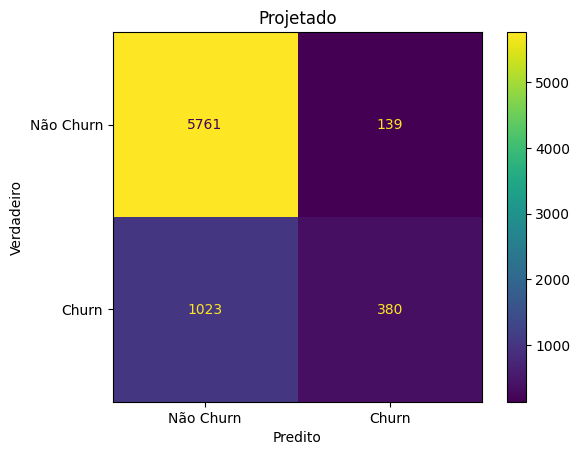

In [326]:
#Previsão no conjunto de teste
y_pred = rf.predict(X_test)

#Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Churn', 'Churn']).plot()
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Projetado')

Text(0.5, 1.0, 'Curva ROC')

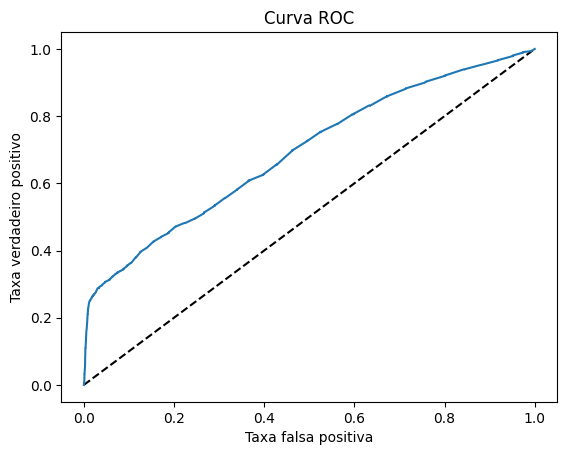

In [327]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('Taxa falsa positiva')
plt.ylabel('Taxa verdadeiro positivo')
plt.title('Curva ROC')

In [328]:
print(f'Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}\n')


print(f'Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}')
print(f'Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}\n')


print(f'Precision (Treino): {precision_score(y_train, rf.predict(X_train))}')
print(f'Precision (Teste): {precision_score(y_test, rf.predict(X_test))}\n')


print(f'Recall (Treino): {recall_score(y_train, rf.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf.predict(X_test))}\n')


print(f'F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}')
print(f'F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}\n')


print(f'ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}')
print(f'ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}')

Acurácia (Treino): 0.994488566342599
Acurácia (Teste): 0.8408873065863344

Acurácia Balanceada (Treino): 0.988516010858076
Acurácia Balanceada (Teste): 0.6236444302161228

Precision (Treino): 0.9926444205238608
Precision (Teste): 0.7321772639691715

Recall (Treino): 0.9787723332743676
Recall (Teste): 0.27084818246614395

F1-Score (Treino): 0.9856595706778303
F1-Score (Teste): 0.39542143600416235

ROCAUC (Treino): 0.9997904925375375
ROCAUC (Teste): 0.6910791040989647
